# Importing libraries


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

# Reading dataset

In [28]:
df=pd.read_csv("covid_symptoms.csv")
df

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,1.0,0.0,0.0,0.0,0.0,0.0,No,Male,Other
1,1.0,1.0,0.0,0.0,0.0,0.0,No,Male,Abroad
2,0.0,1.0,0.0,0.0,0.0,0.0,Yes,Male,Contact with confirmed
3,1.0,1.0,0.0,0.0,0.0,1.0,Yes,Male,Abroad
4,1.0,0.0,0.0,0.0,0.0,0.0,Yes,Female,Contact with confirmed
...,...,...,...,...,...,...,...,...,...
211424,0.0,1.0,0.0,0.0,0.0,1.0,Yes,Male,Other
211425,0.0,0.0,0.0,0.0,0.0,1.0,No,Male,Other
211426,0.0,0.0,0.0,0.0,0.0,1.0,No,NaN,Other
211427,0.0,0.0,0.0,0.0,0.0,1.0,No,Female,Other


In [29]:
df.head(20)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,1.0,0.0,0.0,0.0,0.0,0.0,No,Male,Other
1,1.0,1.0,0.0,0.0,0.0,0.0,No,Male,Abroad
2,0.0,1.0,0.0,0.0,0.0,0.0,Yes,Male,Contact with confirmed
3,1.0,1.0,0.0,0.0,0.0,1.0,Yes,Male,Abroad
4,1.0,0.0,0.0,0.0,0.0,0.0,Yes,Female,Contact with confirmed
5,1.0,1.0,0.0,0.0,0.0,1.0,Yes,Male,Contact with confirmed
6,0.0,0.0,0.0,0.0,0.0,0.0,No,Male,Other
7,1.0,1.0,1.0,0.0,1.0,0.0,No,Female,Abroad
8,1.0,0.0,1.0,0.0,0.0,0.0,No,Female,Abroad
9,1.0,1.0,1.0,1.0,0.0,0.0,No,Female,Abroad


# Data Preprocessing

### Removing null values


In [30]:
df.isnull().sum()

cough                   243
fever                   243
sore_throat             243
shortness_of_breath     243
head_ache               243
corona_result           243
age_60_and_above        243
gender                 5371
test_indication         243
dtype: int64

In [31]:
df=df.dropna()

In [32]:
df.isnull().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

#### There are no null values

In [33]:
np.shape(df)

(206058, 9)

### Replacing categorical variables with numbers

In [34]:
df=df.replace(to_replace="No", value=0.0)
df=df.replace(to_replace="Yes", value=1.0)

In [35]:
df=df.replace(to_replace="Male", value=0.0)
df=df.replace(to_replace="Female",value=1.0)

In [36]:
df=df.replace(to_replace="Other", value=1.0)
df=df.replace(to_replace="Abroad", value=2.0)
df=df.replace(to_replace="Contact with confirmed",value=3.0)

In [37]:
df.head(10)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
3,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0
5,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0
8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
9,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0


# Distribution of positive and negative results

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


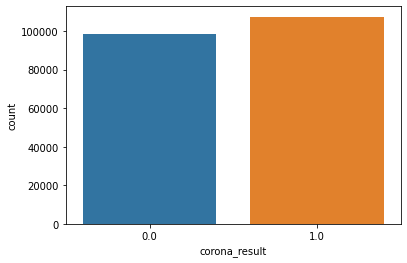

In [38]:
sn.countplot(df["corona_result"])
plt.show()

# Checking for relationship among variables


,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
cough,1.000000,0.405062,0.202896,0.195795,0.220778,0.377659,0.000766,-0.039114,0.301624
fever,0.405062,1.000000,0.160196,0.180182,0.247458,0.437327,0.073613,-0.087300,0.241511
sore_throat,0.202896,0.160196,1.000000,0.150116,0.282549,0.264471,-0.032025,0.035454,0.175073
shortness_of_breath,0.195795,0.180182,0.150116,1.000000,0.162358,0.222676,0.032874,-0.000051,0.112905
head_ache,0.220778,0.247458,0.282549,0.162358,1.000000,0.330164,-0.045978,0.019952,0.217364
corona_result,0.377659,0.437327,0.264471,0.222676,0.330164,1.000000,0.051769,-0.066191,0.540474
age_60_and_above,0.000766,0.073613,-0.032025,0.032874,-0.045978,0.051769,1.000000,0.012782,-0.046620
gender,-0.039114,-0.087300,0.035454,-0.000051,0.019952,-0.066191,0.012782,1.000000,0.011922
test_indication,0.301624,0.241511,0.175073,0.112905,0.217364,0.540474,-0.046620,0.011922,1.000000


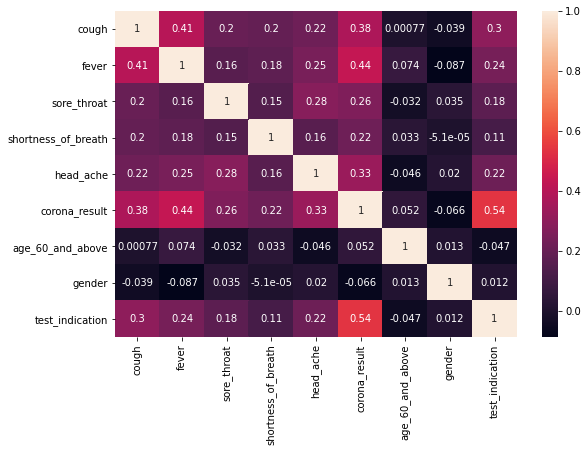

In [39]:
plt.figure(figsize=(9,6))
c=df.corr()
sn.heatmap(c,xticklabels=c.columns,yticklabels=c.columns,annot=True)
c

# Train-Test split 

In [40]:
df.columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'corona_result', 'age_60_and_above', 'gender', 'test_indication'],
      dtype='object')

In [41]:
X=df[['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 
      'age_60_and_above', 'gender', 'test_indication']]

In [42]:
y=df['corona_result']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Naive Bayes

In [58]:
naives_model = GaussianNB()
naives_model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
Y_hat = naives_model.predict(X_test)
Y_hat

array([1., 1., 0., ..., 0., 0., 0.])

In [60]:
model_acc = accuracy_score(y_test, Y_hat)
print('The accuracy of our naive model is: %0.2f'% model_acc)

The accuracy of our naive model is: 0.83


# Decision Tree

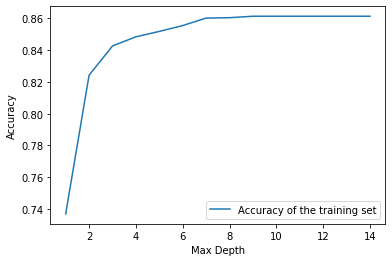

In [63]:
training_accuracy = []
test_accuracy = []
max_dep = range(1,15)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=0)
    tree.fit(X_train,y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))
 
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()


In [70]:
tree = DecisionTreeClassifier(max_depth=3,random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [71]:
tree.score(X_test, y_test)

0.8432301271474328

# Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier()

In [45]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [46]:
pred_gb=clf.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_gb)

0.8617878287877317

In [48]:

confusion_matrix(y_test,pred_gb) 

array([[22342,  2202],
       [ 4918, 22053]])

In [49]:
print(classification_report(y_test,pred_gb))

              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86     24544
         1.0       0.91      0.82      0.86     26971

    accuracy                           0.86     51515
   macro avg       0.86      0.86      0.86     51515
weighted avg       0.87      0.86      0.86     51515



# RandomForest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=2)

In [51]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
pred_rfc=rfc.predict(X_test)

In [53]:
accuracy_score(y_test,pred_rfc)

0.8467630787149374

In [54]:
confusion_matrix(y_test,pred_rfc)

array([[21602,  2942],
       [ 4952, 22019]])

In [55]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.85     24544
         1.0       0.88      0.82      0.85     26971

    accuracy                           0.85     51515
   macro avg       0.85      0.85      0.85     51515
weighted avg       0.85      0.85      0.85     51515



# Accuracy Results

<b>
    <li>Naive Bayes- 83%
    <li>Decision Tree- 84.3%
    <li>Gradient Boosting- 86.27%
    <li>RandomForest Classifier- 84.58%
    

### Gradient boosting gives the best results